<a href="https://colab.research.google.com/github/arghads9177/rnn-twitter-sentiment-analysis/blob/master/RNN_twitter_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Twitter Sentiment Analysis with RNN**

## Project Overview  
This project focuses on building a Recurrent Neural Network (RNN) model for performing **entity-level sentiment analysis** on Twitter data. The goal is to predict the sentiment (Positive, Negative, or Neutral) of a given tweet about a particular entity. This sentiment analysis task involves evaluating how tweets relate to entities mentioned in them, making it useful for brand monitoring, public opinion analysis, and social media insights.

---

## About the Dataset  

### Dataset Description  
- **Number of Rows:** 74,682  
- **Number of Columns:** 4  
- **Classes:**  
  - **Positive**  
  - **Negative**  
  - **Neutral** (Tweets that are irrelevant to the entity are considered Neutral)  

### Features  
| Feature Name   | Description                                            |
|----------------|--------------------------------------------------------|
| **Tweet_ID**   | Unique identifier for each tweet (integer)             |
| **entity**     | Entity (e.g., company name, product, person, etc.)      |
| **sentiment**  | The sentiment of the tweet towards the entity (Positive, Negative, Neutral) |
| **Tweet_content** | The actual text content of the tweet                  |

### Key Observations  
- The dataset is primarily concerned with understanding the sentiment of tweets about specific entities.  
- The **Neutral** category includes tweets that are irrelevant to the entity mentioned.  
- The data is balanced across the three sentiment classes (Positive, Negative, and Neutral).

---

## Objective  

- **Sentiment Classification:**  
  Develop an RNN model to predict the sentiment of tweets regarding the given entity.  
- **Applications:**  
  - Analyzing public sentiment towards brands, products, or public figures.  
  - Understanding consumer opinions and feedback in real-time.  
  - Monitoring social media for sentiment-driven events and trends.

---

## Methodology  

### 1. **Data Preprocessing**  
   - **Text Preprocessing:**  
     - Tokenization, removing stop words, and lemmatization.  
     - Text vectorization using techniques like **TF-IDF** or **Word Embeddings** (Word2Vec, GloVe).  
   - **Label Encoding:**  
     - Convert sentiment labels (Positive, Negative, Neutral) into numerical format using label encoding or one-hot encoding.  
   
### 2. **Model Development**  
   - **RNN Architecture:**  
     - Use an RNN or **LSTM/GRU** to capture the sequential nature of tweet data.  
   - **Embedding Layer:**  
     - Pre-trained word embeddings (e.g., GloVe, Word2Vec) for better understanding of words in context.  
   - **Dense Layer:**  
     - Fully connected layers for classification into the three sentiment classes.  
   - **Activation Functions:**  
     - **Softmax** for multi-class classification in the output layer.  

### 3. **Model Training and Optimization**  
   - **Loss Function:** **Categorical Cross-Entropy**  
   - **Optimizers:** **Adam**, **RMSprop**  
   - **Metrics:** Accuracy, Precision, Recall, F1-score  

### 4. **Evaluation**  
   - Evaluate the model using a **confusion matrix** and **classification report**.  
   - Analyze precision, recall, and F1-score to assess performance on each sentiment class.  

### 5. **Visualization**  
   - Visualize training and validation accuracy/loss over epochs.  
   - Visualize sample tweet predictions and misclassifications.  

---

## Tools and Libraries  

- **Frameworks:** Keras, TensorFlow, PyTorch  
- **Data Handling:** Pandas, NumPy  
- **Text Processing:** NLTK, SpaCy, scikit-learn  
- **Visualization:** Matplotlib, seaborn  

---

## Future Enhancements  

1. **Model Optimization:**  
   - Experiment with different RNN architectures, such as **Bidirectional LSTM** or **Attention Mechanism**.  
   
2. **Transfer Learning:**  
   - Leverage pre-trained models like **BERT** or **GPT** for fine-tuning on this dataset.  

3. **Real-Time Sentiment Analysis:**  
   - Deploy the model in a real-time environment to monitor ongoing Twitter sentiment.  

4. **Integration with Applications:**  
   - Integrate the sentiment analysis tool with social media dashboards for businesses or political entities to monitor public sentiment in real-time.

---

## Dataset Information  

- **Name:** Twitter Sentiment Analysis Dataset  
- **Source:** [Kaggle](https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis?resource=download)  
- **Size:** ~1 MB  
- **Format:** CSV  

---

## Conclusion  

The **Twitter Sentiment Analysis Dataset** provides valuable insights into how people feel about different entities on Twitter. By utilizing **Recurrent Neural Networks (RNNs)**, this project explores an effective way to capture the context of sequential data (tweets) and perform sentiment classification for various real-world applications.

### Import Libraies

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, accuracy_score

from sklearn.utils import resample
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
from tensorflow.keras.initializers import Constant

from gensim.models import Word2Vec
from tensorflow.keras.layers import Embedding

### Settings

In [2]:
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")

### Load Data

In [3]:
df = pd.read_csv("twitter_training.csv", encoding="utf-8", header=None, names= ["Tweet_ID", "entity", "sentiment", "Tweet_content"])

In [4]:
# Show 1st 5 rows to get an idea about the data present in each feature
df.head()

,Tweet_ID,entity,sentiment,Tweet_content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


### EDA- Gather General Information about Dataset

In [5]:
# Data Description
print("=" * 60)
print("DATA DESCRIPTION")
print("=" * 60)
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]}")

DATA DESCRIPTION
Number of Rows: 74682
Number of Columns: 4


In [6]:
# Feature Description
print("=" * 60)
print("FEATURE DESCRIPTION")
print("=" * 60)
print(df.dtypes)

FEATURE DESCRIPTION
Tweet_ID          int64
entity           object
sentiment        object
Tweet_content    object
dtype: object


In [7]:
# Check Missing Values
def check_missing():
  print("=" * 60)
  print("MISSING VALUE DETECTION")
  print("=" * 60)
  if df.isnull().sum().sum() > 0:
    print(df.isnull().sum())
  else:
    print("No Missing Values Found in any feature")

check_missing()

MISSING VALUE DETECTION
Tweet_ID           0
entity             0
sentiment          0
Tweet_content    686
dtype: int64


In [8]:
# Check Duplicate observations
def check_duplicates():
  print("=" * 60)
  print("DUPLICATE ROW DETECTION")
  print("=" * 60)
  print(f"Total Number of Duplicate Rows: {df.duplicated().sum()}")

check_duplicates()

DUPLICATE ROW DETECTION
Total Number of Duplicate Rows: 2700


### Data Cleaning

In [9]:
# Remove the rows having missing values
df.dropna(inplace=True)
check_missing()

MISSING VALUE DETECTION
No Missing Values Found in any feature


In [10]:
# Remove the duplicate rows
df.drop_duplicates(inplace=True)
check_duplicates()

DUPLICATE ROW DETECTION
Total Number of Duplicate Rows: 0


### Sentiment Analysis

SENTIMENT ANALYSIS
    sentiment  count
0    Negative  21698
1    Positive  19713
2     Neutral  17708
3  Irrelevant  12537


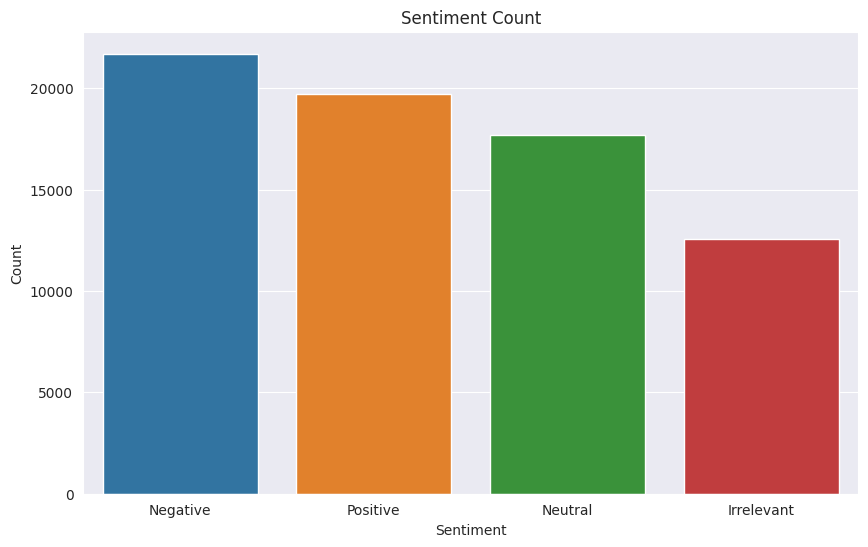

In [11]:
# Count each sentiment value
sentiment_count = df["sentiment"].value_counts().reset_index()
sentiment_count.columns = ["sentiment", "count"]
print("=" * 60)
print("SENTIMENT ANALYSIS")
print("=" * 60)
print(sentiment_count)

# Visualize the sentiment count
plt.figure(figsize=(10, 6))
sns.barplot(x="sentiment", y="count", data=sentiment_count, hue= "sentiment")
plt.title("Sentiment Count")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

### **Sentiment Count Analysis**

#### **Overview of Sentiment Distribution**
The dataset contains tweets categorized into four sentiment classes: **Negative**, **Positive**, **Neutral**, and **Irrelevant**. Below is the detailed breakdown:

- **Negative (21,698)**: The largest sentiment category, comprising approximately **29.03%** of the dataset. This indicates a significant portion of the tweets express negative sentiments.
- **Positive (19,713)**: Positive tweets account for about **26.39%** of the dataset, suggesting a substantial portion expresses favorable opinions.
- **Neutral (17,708)**: Neutral tweets make up **23.72%** of the dataset, representing tweets with no strong emotional tone.
- **Irrelevant (12,537)**: This category, accounting for **16.79%** of the dataset, includes tweets unrelated to sentiment analysis.

---

#### **Insights and Observations**

1. **Class Imbalance**:
   - The dataset is **imbalanced**, with noticeable differences in sentiment counts.
   - "Negative" and "Positive" classes dominate, while "Neutral" and "Irrelevant" classes are comparatively smaller.
   - This imbalance can lead to biased model predictions favoring majority classes.

2. **Impact on Model Performance**:
   - Models trained on this data may:
     - **Underperform on minority classes**, particularly Neutral and Irrelevant.
     - Show skewed metrics like accuracy due to dominance of majority classes.

3. **Relevance of the "Irrelevant" Class**:
   - The "Irrelevant" category could dilute the focus on sentiment polarity (positive, negative, neutral).
   - Excluding or treating it as a separate task might improve the focus of the sentiment analysis.

In [12]:
# Exclude the Irrelivant sentiment class.
df = df[df["sentiment"] != "Irrelevant"]
df.reset_index(inplace=True)
df["sentiment"].value_counts()

,count
sentiment,
Negative,21698
Positive,19713
Neutral,17708


In [66]:
df["sentiment_encoded"] = df["sentiment"].map({"Negative": 0, "Positive": 2, "Neutral": 1})

### Preprocessing

In [67]:
# Extract features and labels
texts = df['Tweet_content']
labels = df['sentiment_encoded']


In [16]:
# Convert labels to categorical format
categorical_labels = to_categorical(labels)

# Tokenize and preprocess the text data
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Pad sequences to ensure uniform input size
padded_sequences = pad_sequences(sequences, maxlen=50, padding='post', truncating='post')

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, categorical_labels, test_size=0.2, random_state=42)


In [18]:
# Define the RNN model
model = Sequential([
    Embedding(input_dim=10000, output_dim=64, input_length=50),  # Embedding layer
    SimpleRNN(64, return_sequences=False),  # Vanilla RNN layer
    Dropout(0.5),  # Dropout for regularization
    Dense(64, activation='relu'),  # Fully connected layer
    Dropout(0.5),  # Dropout for further regularization
    Dense(3, activation='softmax')  # Output layer (3 classes: Positive, Negative, Neutral)
])

# Compile the model
model.compile(
    loss='categorical_crossentropy',  # Multi-class classification loss
    optimizer='adam',
    metrics=['accuracy']
)

# Display the model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [19]:
# Train the RNN model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=64,
    verbose=1
)


Epoch 1/10
739/739 ━━━━━━━━━━━━━━━━━━━━ 22s 25ms/step - accuracy: 0.3830 - loss: 1.0883 - val_accuracy: 0.5041 - val_loss: 0.9890
Epoch 2/10
739/739 ━━━━━━━━━━━━━━━━━━━━ 18s 25ms/step - accuracy: 0.5366 - loss: 0.9596 - val_accuracy: 0.5962 - val_loss: 0.8910
Epoch 3/10
739/739 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.6679 - loss: 0.8077 - val_accuracy: 0.6599 - val_loss: 0.8056
Epoch 4/10
739/739 ━━━━━━━━━━━━━━━━━━━━ 22s 30ms/step - accuracy: 0.7437 - loss: 0.6674 - val_accuracy: 0.6923 - val_loss: 0.7605
Epoch 5/10
739/739 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.7918 - loss: 0.5591 - val_accuracy: 0.7216 - val_loss: 0.7113
Epoch 6/10
739/739 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.8306 - loss: 0.4689 - val_accuracy: 0.7179 - val_loss: 0.7225
Epoch 7/10
739/739 ━━━━━━━━━━━━━━━━━━━━ 18s 25ms/step - accuracy: 0.8574 - loss: 0.4008 - val_accuracy: 0.7350 - val_loss: 0.7213
Epoch 8/10
739/739 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.8725 - loss: 0.3566 - 

In [20]:
# Evaluate model performance on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


370/370 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7574 - loss: 0.7045
Test Loss: 0.6904
Test Accuracy: 0.7602


In [22]:
# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Print classification report
print(classification_report(y_test_classes, y_pred_classes))

370/370 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
              precision    recall  f1-score   support

           0       0.85      0.79      0.82      4404
           1       0.70      0.71      0.70      3454
           2       0.73      0.77      0.75      3966

    accuracy                           0.76     11824
   macro avg       0.76      0.76      0.76     11824
weighted avg       0.76      0.76      0.76     11824



### **Interpretation**
1. **Class-wise Analysis**:
   - **Negative (Class 0)**:
     - The model performs best for this class, with an F1-score of **0.82**, indicating a good balance between precision and recall.
     - Precision of **0.85** suggests the model correctly identifies most negative tweets without many false positives.
   - **Neutral (Class 1)**:
     - This class has the lowest F1-score (**0.70**), highlighting that the model struggles slightly with neutral sentiments.
     - Recall of **0.71** shows that the model identifies most neutral tweets but may still miss some.
   - **Positive (Class 2)**:
     - The model performs moderately well with an F1-score of **0.75**, but precision and recall could still be improved.

2. **Overall Accuracy**:
   - An overall accuracy of **76%** is a reasonable baseline but indicates room for improvement, especially for the Neutral and Positive classes.

3. **Class Imbalance**:
   - The **class imbalance** (e.g., fewer Neutral samples compared to Negative ones) may contribute to the lower performance for the Neutral class.

---

### **Conclusions**
1. **Strengths**:
   - The model handles **Negative sentiments** effectively, achieving the highest precision and recall for this class.
   - Overall accuracy and macro-average F1-score of **76%** demonstrate the potential of vanilla RNNs for this sentiment analysis task.

2. **Weaknesses**:
   - **Neutral and Positive classes** are less accurately classified, possibly due to overlap in textual features or the inherent ambiguity in these sentiments.
   - Vanilla RNNs may struggle with long-term dependencies in text, which limits the model's ability to capture nuanced sentiments in longer tweets.

---

### **Potential Improvements**
1. **Class Balancing**:
   - Apply techniques like oversampling minority classes (Neutral and Positive) or using class weighting during model training.

2. **Enhanced Preprocessing**:
   - Use advanced tokenization techniques (e.g., stemming, lemmatization) to improve text representation.
   - Experiment with word embeddings such as **GloVe** or **Word2Vec** for richer input representations.

3. **Hyperparameter Tuning**:
   - Optimize hyperparameters like learning rate, dropout rate, number of RNN units, and batch size to improve model performance.

4. **Architectural Enhancements**:
   - While staying within vanilla RNN, experimenting with **deeper RNN layers** or **bidirectional RNNs** can help capture more contextual information.
   - Transitioning to LSTMs or GRUs in future iterations could address the vanishing gradient problem and improve performance further.

5. **Domain-Specific Features**:
   - Incorporate additional features like **sentiment lexicons**, hashtags, or emojis to capture sentiment-related cues.

---

### **Final Thoughts**
The vanilla RNN provides a decent baseline performance for sentiment analysis but has limitations in capturing complex relationships within textual data. By addressing the class imbalance, fine-tuning the model, and exploring advanced text representations, the overall performance can be significantly improved.








In [28]:
# Download NLTK data
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [76]:
# Oversample minority classes (Neutral and Positive)
class_0 = df[df['sentiment'] == 'Negative']
class_1 = df[df['sentiment'] == 'Neutral']
class_2 = df[df['sentiment'] == 'Positive']

# Resample to match the majority class size
class_1_upsampled = resample(class_1, replace=True, n_samples=len(class_0), random_state=42)
class_2_upsampled = resample(class_2, replace=True, n_samples=len(class_0), random_state=42)

# Combine balanced data
df_balanced = pd.concat([class_0, class_1_upsampled, class_2_upsampled])

# Shuffle the dataset
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

df_balanced["sentiment_encoded"] = df_balanced["sentiment"].map({"Negative": 0, "Positive": 2, "Neutral": 1})

# Update texts and labels
texts = df_balanced['Tweet_content']
labels = df_balanced['sentiment_encoded']

### Advance Preprocessing

In [80]:
# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Tokenize and lemmatize
    tokens = word_tokenize(text.lower())  # Convert to lowercase and tokenize
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return " ".join(lemmatized_tokens)

# Apply preprocessing
texts = texts.apply(preprocess_text)


# Convert labels to categorical
categorical_labels = to_categorical(labels)


### Apply word2vec embedding

In [44]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)  # Fit tokenizer on the texts
word_index = tokenizer.word_index  # Mapping of words to their indices

sequences = tokenizer.texts_to_sequences(texts)
max_length = max(len(seq) for seq in sequences)

# Pad sequences
padded_sequences = pad_sequences(sequences, maxlen=50, padding='post', truncating='post')

# Train Word2Vec on the tweet text
documents = [text.split() for text in texts]  # Tokenized text
word2vec_model = Word2Vec(sentences=documents, vector_size=100, window=5, min_count=1, workers=4)

# Create embedding matrix
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, 100))  # Vector size = 100
for word, i in word_index.items():
    if word in word2vec_model.wv:
        embedding_matrix[i] = word2vec_model.wv[word]


In [45]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, categorical_labels, test_size=0.2, random_state=42)


In [46]:
# Define the RNN model with Word2Vec embeddings
model = Sequential()
model.add(Embedding(input_dim=vocab_size,
                    output_dim=100,
                    weights=[embedding_matrix],
                    input_length=max_length,
                    trainable=True))  # Trainable for fine-tuning
model.add(SimpleRNN(128, activation='relu'))
model.add(Dense(3, activation='softmax'))  # 3 sentiment classes
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [47]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=64,
    verbose=1
)


Epoch 1/10
814/814 ━━━━━━━━━━━━━━━━━━━━ 48s 55ms/step - accuracy: 0.3412 - loss: 1.1010 - val_accuracy: 0.3441 - val_loss: 1.0926
Epoch 2/10
814/814 ━━━━━━━━━━━━━━━━━━━━ 89s 64ms/step - accuracy: 0.3520 - loss: 1.0807 - val_accuracy: 0.3498 - val_loss: 1.0918
Epoch 3/10
814/814 ━━━━━━━━━━━━━━━━━━━━ 74s 55ms/step - accuracy: 0.3589 - loss: 1.0746 - val_accuracy: 0.3601 - val_loss: 1.0755
Epoch 4/10
814/814 ━━━━━━━━━━━━━━━━━━━━ 44s 55ms/step - accuracy: 0.3766 - loss: 1.0555 - val_accuracy: 0.3663 - val_loss: 1.0723
Epoch 5/10
814/814 ━━━━━━━━━━━━━━━━━━━━ 44s 54ms/step - accuracy: 0.3798 - loss: 1.0437 - val_accuracy: 0.3570 - val_loss: 1.0782
Epoch 6/10
814/814 ━━━━━━━━━━━━━━━━━━━━ 81s 52ms/step - accuracy: 0.3864 - loss: 1.0371 - val_accuracy: 0.3765 - val_loss: 1.0659
Epoch 7/10
814/814 ━━━━━━━━━━━━━━━━━━━━ 83s 53ms/step - accuracy: 0.4050 - loss: 1.0227 - val_accuracy: 0.3933 - val_loss: 1.0537
Epoch 8/10
814/814 ━━━━━━━━━━━━━━━━━━━━ 83s 55ms/step - accuracy: 0.4258 - loss: 1.0095 - 

In [48]:
# Evaluate model performance on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


407/407 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4246 - loss: 1.0514
Test Loss: 1.0532
Test Accuracy: 0.4235


In [49]:
# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Print classification report
print(classification_report(y_test_classes, y_pred_classes))

407/407 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step
              precision    recall  f1-score   support

           0       0.44      0.17      0.24      4373
           1       0.47      0.41      0.44      4347
           2       0.40      0.70      0.51      4299

    accuracy                           0.42     13019
   macro avg       0.44      0.43      0.39     13019
weighted avg       0.44      0.42      0.39     13019



### **Insights from Classification Report**

#### **Overview**
The performance of the sentiment classification model using Word2Vec embeddings and resampled data shows the following results:

##### **Class-wise Performance**
1. **Negative Sentiment (Class 0)**:
   - **Precision**: 0.44 — Many false positives, indicating difficulty distinguishing negative sentiment.
   - **Recall**: 0.17 — Poor recall, meaning the model fails to correctly identify most negative samples.
   - **F1-Score**: 0.24 — Overall poor performance for this class.

2. **Neutral Sentiment (Class 1)**:
   - **Precision**: 0.47 — Moderate precision, indicating some misclassification of neutral samples.
   - **Recall**: 0.41 — Moderate recall, with slightly better identification compared to class 0.
   - **F1-Score**: 0.44 — Balanced but low performance for neutral sentiment.

3. **Positive Sentiment (Class 2)**:
   - **Precision**: 0.40 — Many false positives, suggesting misclassification of other classes as positive.
   - **Recall**: 0.70 — Good recall, indicating the model identifies positive samples better than the other classes.
   - **F1-Score**: 0.51 — Best performance among all classes but still suboptimal.

##### **Overall Model Performance**
- **Accuracy**: 0.42 — The model correctly classifies 42% of the total samples, which is insufficient for practical use.
- **Macro Average**:
  - **Precision**: 0.44 — Low precision across all classes.
  - **Recall**: 0.43 — Slightly better recall, especially due to class 2 performance.
  - **F1-Score**: 0.39 — Poor overall balance between precision and recall.
- **Weighted Average**:
  - Similar to macro averages, indicating poor performance even after accounting for class imbalances.

---

#### **Insights**
1. **Class Imbalance Issues**:
   - Resampling has not sufficiently resolved class imbalance, as reflected in poor recall for class 0 and moderate performance for class 1.

2. **Word2Vec Embeddings**:
   - Word2Vec embeddings may not be capturing the contextual relationships effectively, leading to misclassifications.

3. **Misclassification Trends**:
   - Positive sentiment (class 2) recall is higher, but it comes at the cost of low precision, suggesting overprediction of positive sentiment.

4. **Model Limitations**:
   - The current architecture (Simple RNN) and preprocessing pipeline may lack the complexity needed to fully utilize Word2Vec embeddings for sentiment analysis.

---

#### **Next Steps for Improvement**
1. Use pre-trained embeddings (e.g., GloVe) for richer input representations.
2. Enhance model architecture:
   - Add more RNN layers or experiment with Bidirectional RNNs.
3. Optimize hyperparameters (e.g., learning rate, batch size) and apply regularization techniques to reduce overfitting.
4. Apply advanced sampling techniques like SMOTE to balance class distributions more effectively.
